# CHARISMA: Chada peak fit demo

_Bastian Barton, Fraunhofer LBF for Horizon 2020 project CHARISMA (WP4) - May 2021_

In [1]:
from chada import Chada
from chada_io import create

Set file names for example spectrum & create a Chada

In [2]:
source = r"\\vm-stor-51\alle\Projekte Kunststoffe\RD\MA\Öffentliche_Projekte\2020-01-07_230007_H2020-CHARISMA_barton\Python\charisma-raman-spectrum-harmonization\test_data\200218-17.wdf"
target = r"\\vm-stor-51\alle\Projekte Kunststoffe\RD\MA\Öffentliche_Projekte\2020-01-07_230007_H2020-CHARISMA_barton\Python\charisma-raman-spectrum-harmonization\test_data\chada\renishaw.cha"

In [4]:
create(source, target)

Load CHADA archive into Chada object

In [3]:
C = Chada(target)

Show unprocessed data

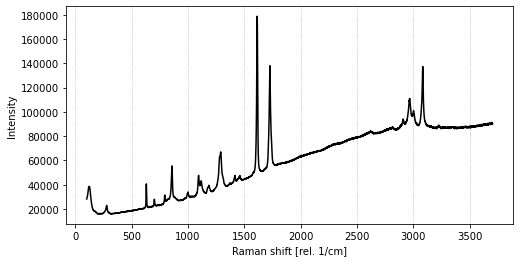

In [4]:
C.plot()

**Do peak search in unprocessed data, fitting each peak with FFT method implemented after**

_Hutsebaut, Didier, Peter Vandenabeele, and Luc Moens. "Evaluation of an accurate calibration and spectral standardization procedure for Raman spectroscopy." Analyst 130.8 (2005): 1204-1214._

- fit_plot: The fit is plotted for each peak
- make_plot: The spectrum is shown with peaks marked

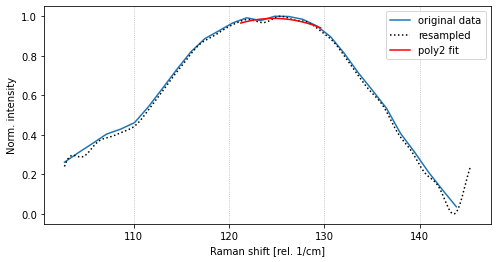

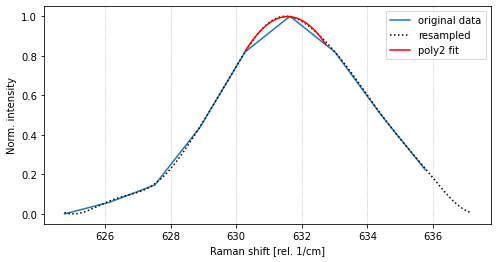

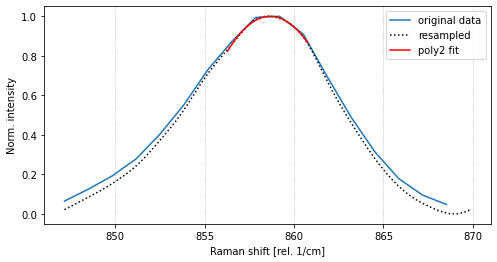

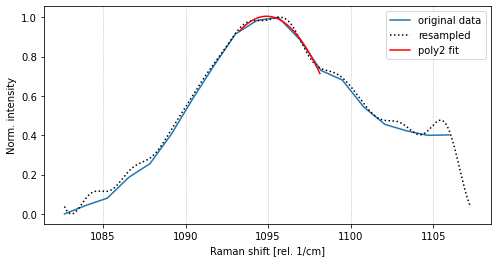

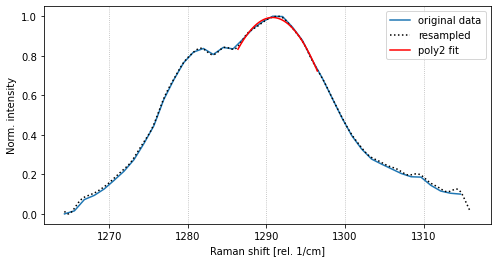

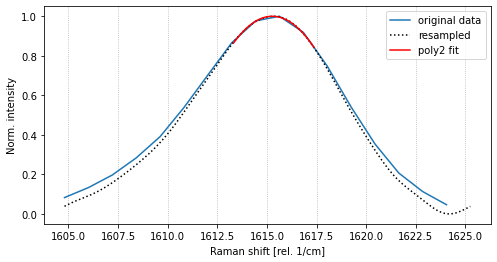

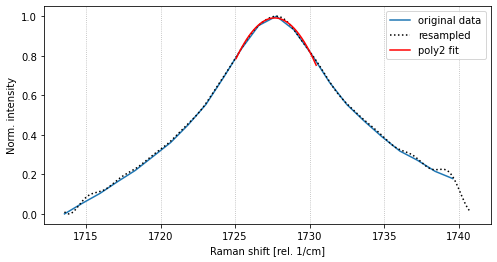

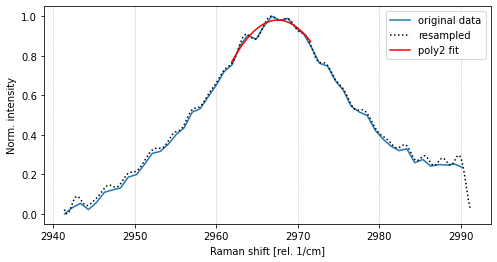

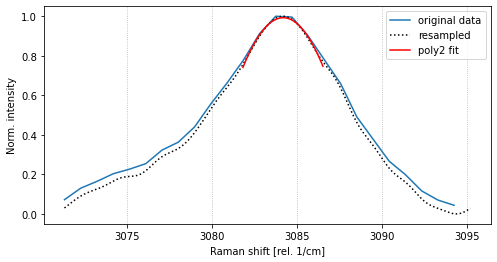

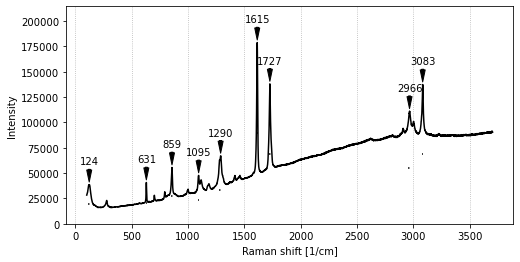

      position  prominence       FWHM  fitted pos.
5  1615.630859    0.785282   9.219832  1615.265881
6  1727.773438    0.504528  12.684208  1727.653587
8  3083.742188    0.314901  14.581803  3084.184984
2   859.189453    0.176096   9.608946   858.670234
4  1290.794922    0.173357  22.654409  1290.777958
7  2966.837891    0.137056  28.724045  2967.561275
1   631.638672    0.119658   4.613863   631.571666
3  1095.613281    0.090611  10.928678  1094.908337
0   124.789062    0.063375  16.915289   124.699209


In [6]:
C.peaks(make_plot=True, fit_plot=True)

Again, with less output:

In [5]:
C.peaks()

      position  prominence       FWHM  fitted pos.
5  1615.630859    0.785282   9.219832  1615.265881
6  1727.773438    0.504528  12.684208  1727.653587
8  3083.742188    0.314901  14.581803  3084.184984
2   859.189453    0.176096   9.608946   858.670234
4  1290.794922    0.173357  22.654409  1290.777958
7  2966.837891    0.137056  28.724045  2967.561275
1   631.638672    0.119658   4.613863   631.571666
3  1095.613281    0.090611  10.928678  1094.908337
0   124.789062    0.063375  16.915289   124.699209


This info is in the attribute *.bands*, which is a Pandas *DataFrame*

In [7]:
C.bands

,position,prominence,FWHM,fitted pos.
5,1615.630859,0.785282,9.219832,1615.265881
6,1727.773438,0.504528,12.684208,1727.653587
8,3083.742188,0.314901,14.581803,3084.184984
2,859.189453,0.176096,9.608946,858.670234
4,1290.794922,0.173357,22.654409,1290.777958
7,2966.837891,0.137056,28.724045,2967.561275
1,631.638672,0.119658,4.613863,631.571666
3,1095.613281,0.090611,10.928678,1094.908337
0,124.789062,0.063375,16.915289,124.699209


Save this result for later comparison

In [6]:
B_raw = C.bands.copy()

**Same exercise, now with baseline-corrected data**

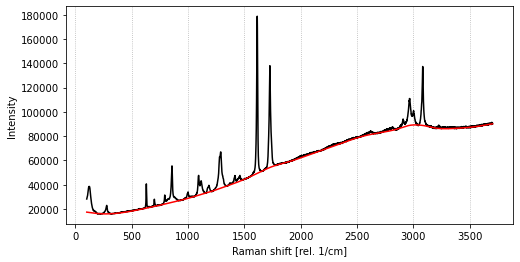

In [7]:
C.fit_baseline(show=True)
C.remove_baseline()

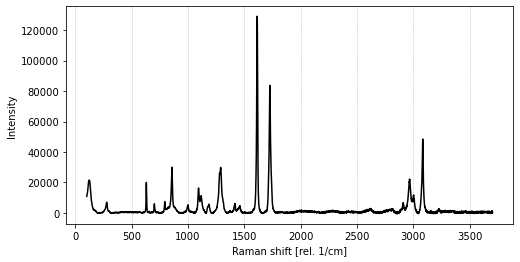

In [8]:
C.plot()

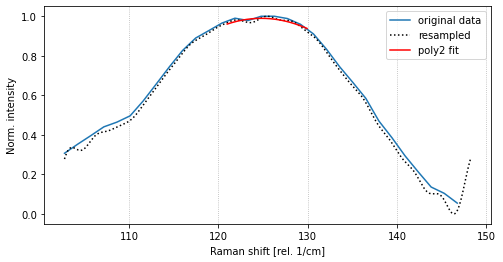

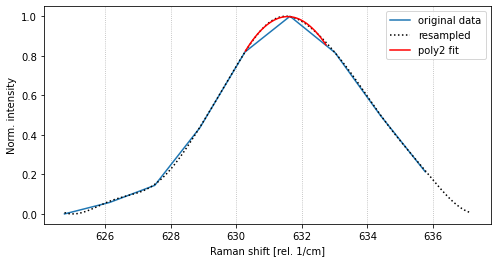

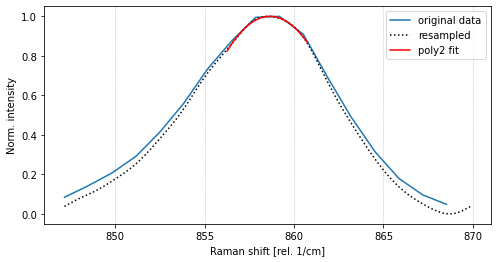

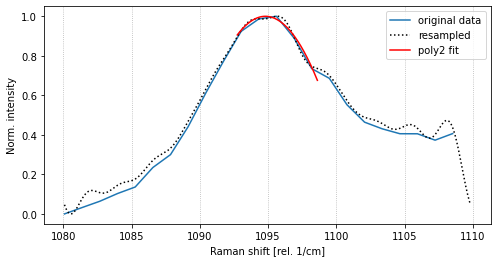

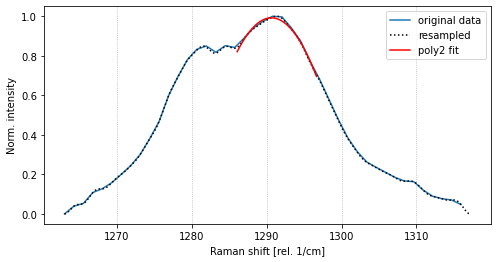

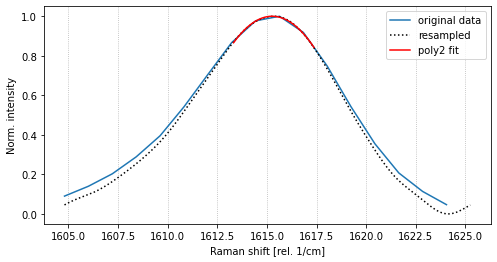

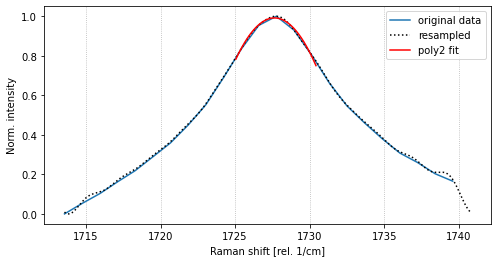

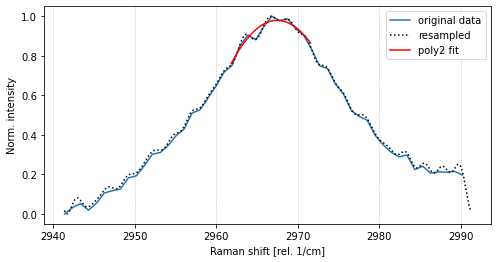

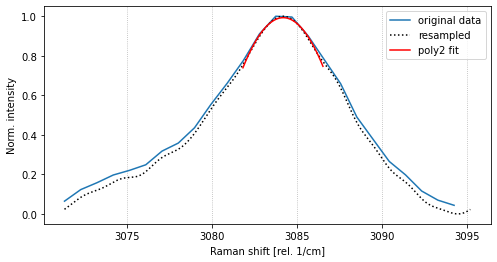

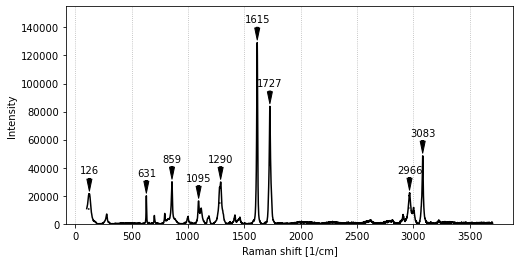

      position  prominence       FWHM  fitted pos.
5  1615.630859    0.997473   9.335072  1615.255738
6  1727.773438    0.648012  13.083837  1727.640125
8  3083.742188    0.377405  13.561351  3084.184984
2   859.189453    0.232344  10.131206   858.658981
4  1290.794922    0.232340  23.814569  1290.645428
7  2966.837891    0.173859  29.127913  2967.488441
1   631.638672    0.155201   4.742382   631.565504
3  1095.613281    0.128173  13.515541  1094.804098
0   126.255859    0.081612  17.158812   124.818686


,position,prominence,FWHM,fitted pos.
5,1615.630859,0.997473,9.335072,1615.255738
6,1727.773438,0.648012,13.083837,1727.640125
8,3083.742188,0.377405,13.561351,3084.184984
2,859.189453,0.232344,10.131206,858.658981
4,1290.794922,0.232340,23.814569,1290.645428
7,2966.837891,0.173859,29.127913,2967.488441
1,631.638672,0.155201,4.742382,631.565504
3,1095.613281,0.128173,13.515541,1094.804098
0,126.255859,0.081612,17.158812,124.818686


In [9]:
C.peaks(make_plot=True, fit_plot=True)
C.bands

The FWHM is indicated in the plot for each peak (zoom in by activating %matplotlib notebook).

<IPython.core.display.Javascript object>


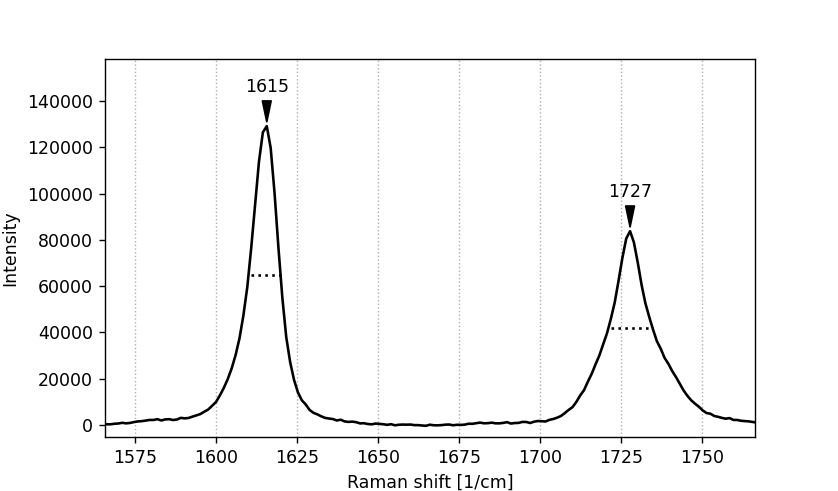

      position  prominence       FWHM  fitted pos.
5  1615.630859    0.997473   9.335072  1615.255738
6  1727.773438    0.648012  13.083837  1727.640125
8  3083.742188    0.377405  13.561351  3084.184984
2   859.189453    0.232344  10.131206   858.658981
4  1290.794922    0.232340  23.814569  1290.645428
7  2966.837891    0.173859  29.127913  2967.488441
1   631.638672    0.155201   4.742382   631.565504
3  1095.613281    0.128173  13.515541  1094.804098
0   126.255859    0.081612  17.158812   124.818686


In [17]:
%matplotlib notebook
C.peaks(make_plot=True)

In [18]:
%matplotlib inline

Compare fitted positions with & without baseline correction

In [13]:
B_raw['compare'] = C.bands['fitted pos.']
B_raw['diff. pos-fit'] = np.abs(B_raw['fitted pos.'] - B_raw['position'])
B_raw['diff. raw-base'] = np.abs(B_raw['fitted pos.'] - B_raw['compare'])

In [14]:
B_raw

,position,prominence,FWHM,fitted pos.,compare,diff. pos-fit,diff. raw-base
5,1615.630859,0.785282,9.219832,1615.265881,1615.255738,0.364979,0.010142
6,1727.773438,0.504528,12.684208,1727.653587,1727.640125,0.119851,0.013462
8,3083.742188,0.314901,14.581803,3084.184984,3084.184984,0.442796,0.000000
2,859.189453,0.176096,9.608946,858.670234,858.658981,0.519219,0.011253
4,1290.794922,0.173357,22.654409,1290.777958,1290.645428,0.016963,0.132530
7,2966.837891,0.137056,28.724045,2967.561275,2967.488441,0.723384,0.072833
1,631.638672,0.119658,4.613863,631.571666,631.565504,0.067005,0.006163
3,1095.613281,0.090611,10.928678,1094.908337,1094.804098,0.704945,0.104238
0,124.789062,0.063375,16.915289,124.699209,124.818686,0.089853,0.119477


For prominent peaks, the fit is robust even without prior baseline separation.